# Assignment 4
Orbitals questions
### Notes
Use base units of years and AU

x,y are potions assumes sun located at origin

u,s are velocities in x and y direcitons

In [1]:
import numpy as np
import matplotlib.pylab as plt
import math as m
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [2]:
#Declare def(s) for methods
########################################################################
#General functions
def MDOA(xo,yo,vXo,vYo): # Intital X location, innitial velocity
    x = np.zeros(len(time))
    y = np.zeros(len(time)) 
    u = np.zeros(len(time))
    s = np.zeros(len(time))
    x[0] = xo
    y[0] = yo
    u[0] = vXo
    s[0] = vYo
    return x, y, u, s

def getComponentPart(r,v,t): # returns x and y compents of a given velocity and theta, only used to set up intial arrays
    theta = np.radians(t)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    u = -1 * v * np.sin(theta) #V is tangent
    s = v * np.cos(theta)
    return  x, y, u, s

def getGM(radius,time): #AU and Years
    return radius * ((2*m.pi*radius)/time)**2

def getPeriVelocity(distance, eccentricity, massRatio, GM): # Mass ration =  PLANET/SUN
    return ( GM * (1+eccentricity)/(distance*(1-eccentricity)) * (1 + massRatio) )**(1/2)

def getRadius(x,y): #Returns radius from a given and y position
    return np.sqrt((x**2 + y**2))

def getH(x,y): #Returns velocity from an x comonent and y component
    return np.sqrt((x**2 + y**2))

def getParAph(x,y): #Determins closest and furthest radius
    radius = getRadius(x,y)
    pari = np.amin(radius)
    aphe = np.amax(radius)
    return pari,aphe

def getAPAngle(x,y): #Determins closest and furthest radius
    radius = getRadius(x,y)
    APIndex, _ = find_peaks(radius)
    timeArray = np.zeros(len(APIndex))
    angleArray = np.zeros(len(APIndex))
    
    for i in range(len(APIndex)):
        angleArray[i] = np.degrees(np.arctan2(y[APIndex[i]],x[APIndex[i]]))
        timeArray[i] = time[APIndex[i]]
        
    dtheta = getExp(np.diff(angleArray))
    dtime = getExp(np.diff(timeArray))
    
    dtdt = dtheta/dtime
    
    return dtdt 

def getEnergy(x,y,u,s, planetMass, SMass):
    ke = np.zeros(len(u))
    pe = np.zeros(len(u))
    te = np.zeros(len(u))
    
    for i in range(len(u)):
        #KE  = 1/2   *      mass     *    V(tangent in m/s) ^ 2
        ke[i] = 0.5 * planetMass * (getH(u[i],s[i])*4743)**2
        #PE  =         - G     *        M1       * M2    /       Radius(in m)
        pe[i] = -1*(6.674*10**-11)*planetMass*SMass/(getH(x[i],y[i])*1.496*10**11)
        te[i] = ke[i] + pe[i]
    
    return ke,pe,te

# def angularMomentum(x,y,u,s,mass): #NOTE: FAILS DUE TO ANGLE 
#     AMarray = np.zeros(len(x))
#     Radius = np.zeros(len(x)) ###
#     Vtan = np.zeros(len(x)) ###
#     for i in range(len(x)):
#         Radius[i] = getRadius(x[i],y[i])
#         Vtan[i] = getH(u[i],s[i])
#         AMarray[i] = Radius[i] * Vtan[i] 

#     return AMarray #Retuns array of angular momentums


def angularMomentum(x,y,u,s,mass):
    AMarray = np.zeros(len(x))
    for i in range(len(x)):
        AMarray[i] = ((x[i-1]*s[i-1]) - (y[i-1]*u[i-1]))
    
    return AMarray #Retuns array of angular momentums

def getExp(vArray): #Value array to get expectation value of
    return np.sum(vArray)/len(vArray)

def getPercentDiff(vArray):
    avg = getExp(vArray)
    high = np.amin(vArray)
    diffHigh = high - avg
    low = np.amax(vArray)
    diffLow = low - avg
    if abs(diffHigh) > abs(diffLow):
        return abs((diffHigh/avg) * 100)
    else:
        return abs((diffLow/avg) * 100)
    
    
def getOrbitalPeriod(xArray,yArray):
    xpeaks, _ = find_peaks(xArray, height=0)
    xPeakTimes = np.zeros(len(xpeaks))
    ypeaks, _ = find_peaks(yArray, height=0)
    yPeakTimes = np.zeros(len(ypeaks))
    for i in range(len(xpeaks)):
        xPeakTimes[i] = time[xpeaks[i]]
    for i in range(len(ypeaks)):
        yPeakTimes[i] = time[ypeaks[i]]
    xPeriods = np.diff(xPeakTimes)
    yPeriods = np.diff(yPeakTimes)
    
    Xavg = getExp(xPeriods)
    Yavg = getExp(yPeriods)
    
    return (Xavg + Yavg) / 2
        
#############################################################################
#Assignment specific functions

#Make Simulation methods
    #Reqires: Time and dt be global varibles prior to call
    #take: radius,velocity, and initial angle (degrees)
    #return: position arrays, velocity arrays
    
#NOTE: Theta does not work how I wanted. ALWAYS PUT ZERO and use Peri Values
    
def EullerOrbit(radius,velocity,theta,GM):
    a,b,c,d = getComponentPart(radius,velocity,theta)
    x, y, u, s = MDOA(a,b,c,d)
    
    for i in range(1,len(x)):
        r = getRadius(x[i-1],y[i-1])
        x[i] = x[i-1] + u[i-1] * dt
        y[i] = y[i-1] + s[i-1] * dt
        u[i] = u[i-1] + ( -GM * x[i-1]/r**3 ) * dt
        s[i] = s[i-1] + ( -GM * y[i-1]/r**3 ) * dt
        
    return x, y, u, s
    
def EcOrbit(radius,velocity,theta,GM):
    a,b,c,d = getComponentPart(radius,velocity,theta)
    x, y, u, s = MDOA(a,b,c,d)
    
    for i in range(1,len(x)):
        r = getRadius(x[i-1],y[i-1]) 
        u[i] = u[i-1] + ( -GM * x[i-1]/r**3 ) * dt
        s[i] = s[i-1] + ( -GM * y[i-1]/r**3 ) * dt
        x[i] = x[i-1] + u[i] * dt
        y[i] = y[i-1] + s[i] * dt
        
    return x, y, u, s
    
def RK2Orbit(radius,velocity,theta,GM):
    a,b,c,d = getComponentPart(radius,velocity,theta)
    x, y, u, s = MDOA(a,b,c,d)
    
    for i in range(1,len(x)):
        r = getRadius(x[i-1],y[i-1])
        #Get prime values
        xp = x[i-1] + 0.5 * dt * u[i-1]
        yp = y[i-1] + 0.5 * dt * s[i-1]
        up = u[i-1] + 0.5 * dt * ( -GM * x[i-1]/r**3 )
        sp = s[i-1] + 0.5 * dt * ( -GM * y[i-1]/r**3 )
        
        #Get next step positon and Velocity
        r = getRadius(xp,yp)
        x[i] = x[i-1] + up * dt
        y[i] = y[i-1] + sp * dt
        u[i] = u[i-1] + dt * ( -GM * xp/r**3 )
        s[i] = s[i-1] + dt * ( -GM * yp/r**3 )
    
    return x, y, u, s

#######################################################################################
#Make time array methods

def setTime(max1,dtvalue): 
    tmin1 = 0
    tmax1 = max1
    dt = dtvalue # 1 day
    time1 = np.arange(tmin1,max1+dt,dt)
    return time1, dt

def linFit(x, m, b):
    return x*m + b

def myLinFit(xArray,yArray):
    param, paramCov = curve_fit(linFit, xArray, yArray)
    yFit = []
    for i in xArray:
        yFit.append(linFit(i,param[0],param[1]))
    slope = param[0]
    B = param[1]
    
    return yFit,slope,B


In [3]:
#Make mass list
sunMass = 1.989*10**30
earthMass = 5.97*10**24
marsMass = 6.39 * 10**23


# 1. KEPLER’S LAWS AND THE STABILITY OF PLANETARY ORBITS

For e = 0
Perihelion: 1.000
Aphelion: 1.000
For e = 0
Perihelion: 0.983
Aphelion: 1.053


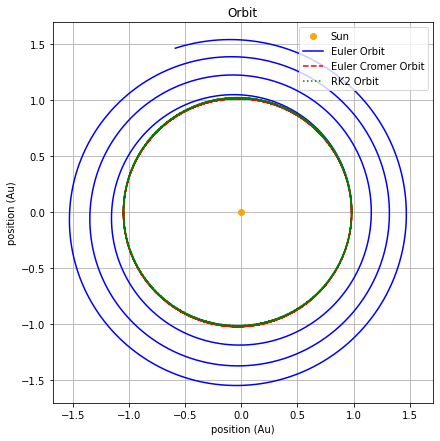

In [4]:
#Test for eath
time,dt = setTime(5,0.0025)

#Get GM (Gravity constant * mass of sun) = radius * velocity**2
GMearth = getGM(1,1)
eEarth = 0.01671
pariEarthRad = .98329 

PeriV1 = getPeriVelocity(1,0,earthMass/sunMass,GMearth) # mass earth/ mass sun

xE,yE,_,_ = EullerOrbit(1,PeriV1,0,GMearth) #Distance, Velocity, angle
xEC,yEC,_,_ = EcOrbit(1,PeriV1,0,GMearth)
xRK,yRK,_,_ = RK2Orbit(1,PeriV1,0,GMearth)

#Get Peri and app
Pari,Aphe = getParAph(xRK,yRK)
print('For e = 0')
print('Perihelion: {:.3f}'.format(Pari))
print('Aphelion: {:.3f}'.format(Aphe))


#DO e = earth
PeriV1 = getPeriVelocity(pariEarthRad,eEarth,earthMass/sunMass,GMearth) # mass earth/ mass sun

xE,yE,_,_ = EullerOrbit(pariEarthRad,PeriV1,0,GMearth) #Distance, Velocity, angle
xEC,yEC,_,_ = EcOrbit(pariEarthRad,PeriV1,0,GMearth)
xRK,yRK,_,_ = RK2Orbit(pariEarthRad,PeriV1,0,GMearth)

#Get Peri and app
Pari,Aphe = getParAph(xRK,yRK)
print('For e = 0')
print('Perihelion: {:.3f}'.format(Pari))
print('Aphelion: {:.3f}'.format(Aphe))


#Make plot
plt.figure(figsize=(7,7))
plt.plot(0,0,'o',color = 'orange',label = 'Sun')
plt.plot(xE,yE, label = r'Euler Orbit', color = 'blue')
plt.plot(xEC,yEC,'--', label = r'Euler Cromer Orbit', color = 'red')
plt.plot(xRK,yRK,':' ,label = r'RK2 Orbit', color = 'green')
plt.axis('square')
plt.grid('on')
plt.title('Orbit')
plt.xlabel('position (Au)')
plt.ylabel('position (Au)')
plt.legend(loc = 'upper right')
plt.show()

## Analysis:
As seen in the orbital shapes, given an eccentricity of 0, and radius of 1Au, and using a planet with an equivalent mass of earth, both the Runge Kutta and Euler Cromer methods allow keep the planet in orbit. While the Euler method shows the plant drifting further from the planet. Using the values from the Rung Kutta method it can be seen the Perihelion and Aphelion both have values of 1, this is expected as the eccentricity was set to zero, this means the orbit should be perfectly circular.

# 2. CONSERVATION LAWS IN PLANETARY ORBITS

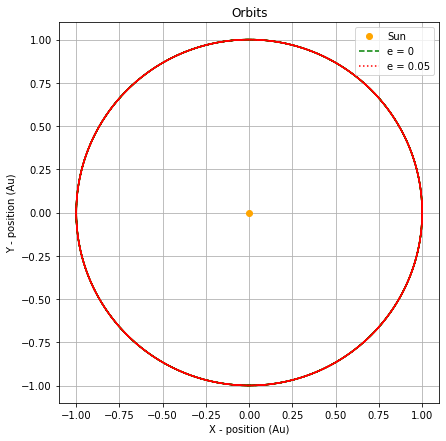

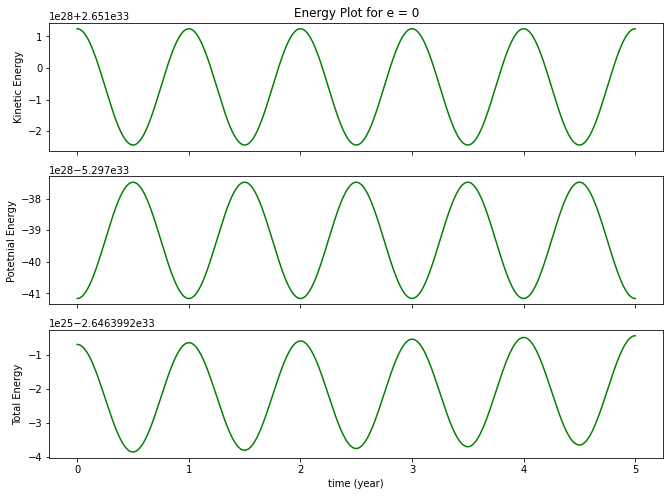

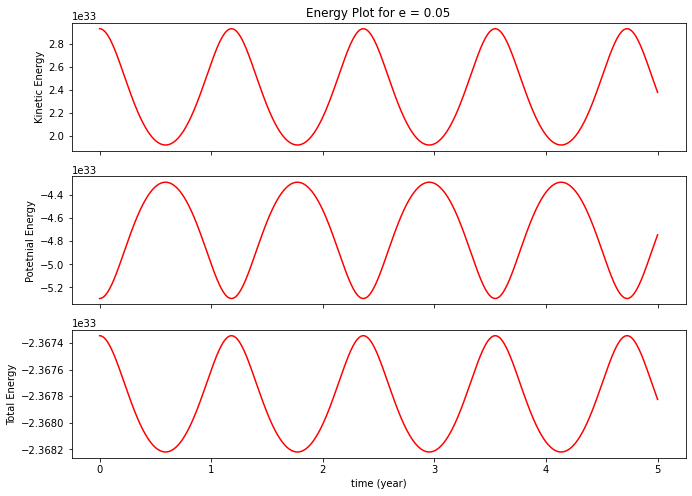

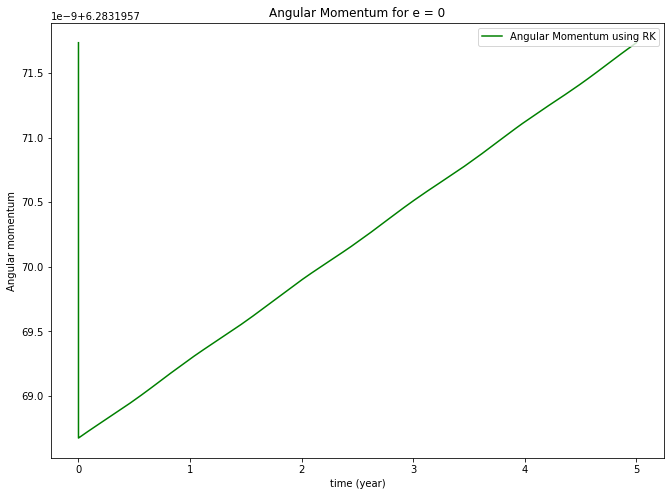

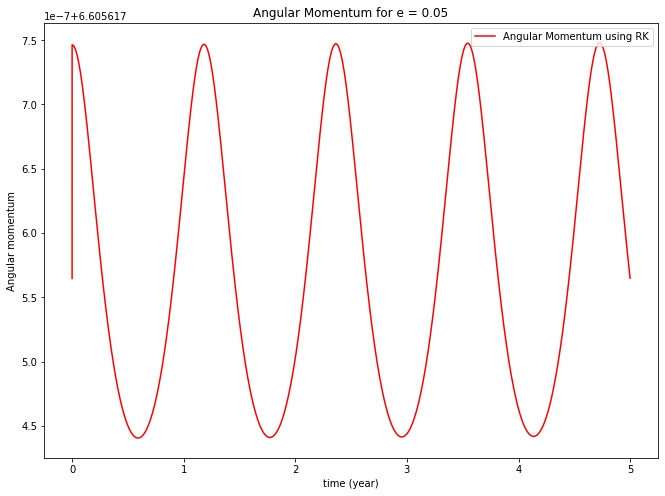

NOTE: ANGULAR MOMENTUM WAS TAKEN USING A MASS OF 1 unit
 
For e = 0
Potential Energy Avg: -5.297393232175639e+33 , fluctuation: 0.0003478487335558049 %
Kinetic Energy Avg: 2.6509940105867843e+33 , fluctuation: 0.0006956554915747364 %
Total Energy Avg: -2.646399221588855e+33 , fluctuation: 6.527756652804744e-07 %
Angular Momentum Avg: 6.283195770198038 , fluctuation: 2.4455173543019814e-08 %
 
For e = 0.05
Potential Energy Avg: -4.7585392540575466e+33 , fluctuation: 11.324324047003973 %
Kinetic Energy Avg: 2.3907264438223025e+33 , fluctuation: 22.559668091989835 %
Total Energy Avg: -2.367812810235243e+33 , fluctuation: 0.01974594923591793 %
Angular Momentum Avg: 6.605617575824818 , fluctuation: 2.607798586128321e-06 %


In [5]:
#Test for eath
esc1 = 0
esc2 = 0.05

time,dt = setTime(5,0.0001)
GMearth = getGM(1,1)

PeriV1 = getPeriVelocity(1,esc1,3.33*10**-6,GMearth) # mass earth/ mass sun
PeriV2 = getPeriVelocity(1,esc2,3.33*10**-6,GMearth)

#Circular orbit first
x1RK,y1RK,u1RK,s1RK = RK2Orbit(1,PeriV1,0,GMearth)
x2RK,y2RK,u2RK,s2RK = RK2Orbit(1,PeriV2,0,GMearth)

#Get energy of planet
kineticEnergy1, potentialEnergy1, totalEnergy1 = getEnergy(x1RK,y1RK,u1RK,s1RK, earthMass, sunMass)
kineticEnergy2, potentialEnergy2, totalEnergy2 = getEnergy(x2RK,y2RK,u2RK,s2RK, earthMass, sunMass) 

#Get Angular momentum
am1RK = angularMomentum(x1RK,y1RK,u1RK,s1RK,earthMass)
am2RK = angularMomentum(x2RK,y2RK,u2RK,s2RK,earthMass)
                         
##############################################################################
    
#Make Orbit plot
plt.figure(figsize=(7,7))
plt.plot(0,0,'o',color = 'orange',label = 'Sun')
plt.plot(x1RK,y1RK,'--',label = r'e = 0', color = 'green')
plt.plot(x1RK,y1RK,':' ,label = r'e = 0.05', color = 'red')
plt.axis('square')
plt.grid('on')
plt.title('Orbits')
plt.xlabel('X - position (Au)')
plt.ylabel('Y - position (Au)')
plt.legend(loc = 'upper right')
plt.show()

#############################################################################

#Make Energy plot Circular e = 0
plt.figure(figsize=(11,8))
#Plot U3
p3 = plt.subplot(3,1,3) #On bottom
plt.plot(time,totalEnergy1, color = 'green')
plt.xlabel("time (year)")
plt.ylabel(r'Total Energy')

#Plot U2
p2 = plt.subplot(3,1,2) #In middle
plt.plot(time,potentialEnergy1, color = 'green')
plt.ylabel(r'Potetnial Energy')
plt.setp(p2.get_xticklabels(), visible=False)

#Plot U1
p1 = plt.subplot(3,1,1, sharex = p3) #On top
plt.plot(time,kineticEnergy1, color = 'green')
plt.title('Energy Plot for e = 0')
plt.ylabel(r'Kinetic Energy')
plt.setp(p1.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=0.20)
plt.show()


#Make Energy plot e = 0.05
plt.figure(figsize=(11,8))
#Plot U3
p3 = plt.subplot(3,1,3) #On bottom
plt.plot(time,totalEnergy2, color = 'red')
plt.xlabel("time (year)")
plt.ylabel(r'Total Energy')

#Plot U2
p2 = plt.subplot(3,1,2) #In middle
plt.plot(time,potentialEnergy2, color = 'red')
plt.ylabel(r'Potetnial Energy')
plt.setp(p2.get_xticklabels(), visible=False)

#Plot U1
p1 = plt.subplot(3,1,1, sharex = p3) #On top
plt.plot(time,kineticEnergy2, color = 'red')
plt.title('Energy Plot for e = 0.05')
plt.ylabel(r'Kinetic Energy')
plt.setp(p1.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=0.20)
plt.show()

#############################################################################

#Plot angular momentum Circular
plt.figure(figsize=(11,8))
plt.plot(time,am1RK,label = r'Angular Momentum using RK', color = 'green')
plt.title('Angular Momentum for e = 0')
plt.xlabel('time (year)')
plt.ylabel('Angular momentum')
plt.legend(loc = 'upper right')
plt.show()

#Plot angular momentum e = 0.05
plt.figure(figsize=(11,8))
plt.plot(time,am2RK,label = r'Angular Momentum using RK', color = 'red')
plt.title('Angular Momentum for e = 0.05')
plt.xlabel('time (year)')
plt.ylabel('Angular momentum')
plt.legend(loc = 'upper right')
plt.show()

##############################################################################
#Do Percent differnce for 1
TEavg1 = getExp(totalEnergy1)
TEdiff1 = getPercentDiff(totalEnergy1)
PEavg1 = getExp(potentialEnergy1)
PEdiff1 = getPercentDiff(potentialEnergy1)
KEavg1 = getExp(kineticEnergy1)
KEdiff1 = getPercentDiff(kineticEnergy1)
AMavg1 = getExp(am1RK)
AMdiff1 = getPercentDiff(am1RK)

#Do percent diffrence for 2
TEavg2 = getExp(totalEnergy2)
TEdiff2 = getPercentDiff(totalEnergy2)
PEavg2 = getExp(potentialEnergy2)
PEdiff2 = getPercentDiff(potentialEnergy2)
KEavg2 = getExp(kineticEnergy2)
KEdiff2 = getPercentDiff(kineticEnergy2)
AMavg2 = getExp(am2RK)
AMdiff2 = getPercentDiff(am2RK)

print('NOTE: ANGULAR MOMENTUM WAS TAKEN USING A MASS OF 1 unit')
print(' ')
print('For e = 0')
print('Potential Energy Avg: {} , fluctuation: {} %'.format(PEavg1,PEdiff1))
print('Kinetic Energy Avg: {} , fluctuation: {} %'.format(KEavg1,KEdiff1))
print('Total Energy Avg: {} , fluctuation: {} %'.format(TEavg1,TEdiff1))
print('Angular Momentum Avg: {} , fluctuation: {} %'.format(AMavg1,AMdiff1))
print(' ') #Make blank lines
print('For e = 0.05')
print('Potential Energy Avg: {} , fluctuation: {} %'.format(PEavg2,PEdiff2))
print('Kinetic Energy Avg: {} , fluctuation: {} %'.format(KEavg2,KEdiff2))
print('Total Energy Avg: {} , fluctuation: {} %'.format(TEavg2,TEdiff2))
print('Angular Momentum Avg: {} , fluctuation: {} %'.format(AMavg2,AMdiff2))


# Analysis: 
As seen in the data above. For an eccentricity of zero, potential, kinetic and total energy  are conserved very well, as in angular momentum. There is less than 0.0007 % fluctuation for the largest values. When increasing the eccentricity, the potential and kinetic energy to begin to fluctuate, they fluctuate by 11% and 22% respectively. Despite this the total energy is conserved to 0.02%. The angular momentum is also conserved very well with a fluctuation of just 2.6E-6.  

# THE PRECESSION OF MERCURY’S ORBIT

For Murcury with alpha = 0
Perihelion: 0.310
Aphelion: 0.489
Period: 0.2526432748538012


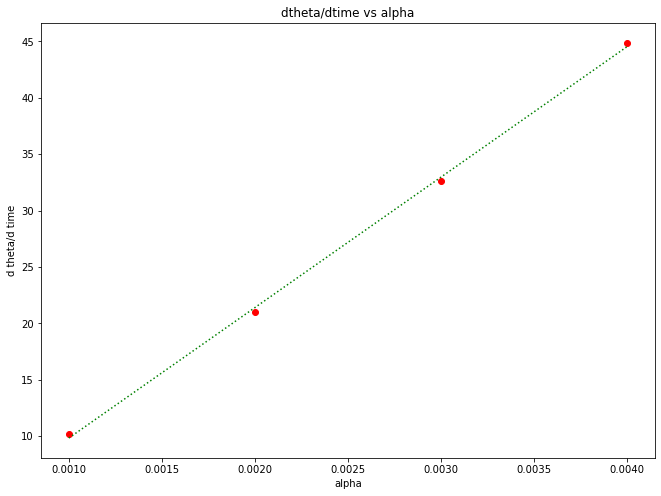

Fit Equation: y = 11561.279337346405x + -1.7253536494607469
Solve for True alpha: 0.0001492527772325933


In [6]:
#######################################################################################
#Percession orbit
def RK2OrbitPer(radius,velocity,theta,GM,alpha): 
    a,b,c,d = getComponentPart(radius,velocity,theta)
    x, y, u, s = MDOA(a,b,c,d)
    
    for i in range(1,len(x)):
        r = getRadius(x[i-1],y[i-1])
        #Get prime values
        xp = x[i-1] + 0.5 * dt * u[i-1]
        yp = y[i-1] + 0.5 * dt * s[i-1]
        up = u[i-1] + 0.5 * dt * ( -GM * x[i-1]/r**3 ) * ( 1 + alpha/r**2 )
        sp = s[i-1] + 0.5 * dt * ( -GM * y[i-1]/r**3 ) * ( 1 + alpha/r**2 )
        
        #Get next step positon and Velocity
        r = getRadius(xp,yp)
        x[i] = x[i-1] + up * dt
        y[i] = y[i-1] + sp * dt
        u[i] = u[i-1] + dt * ( -GM * xp/r**3 ) * ( 1 + alpha/r**2 )
        s[i] = s[i-1] + dt * ( -GM * yp/r**3 ) * ( 1 + alpha/r**2 )
    
    return x, y, u, s

#######################################################################################
time,dt = setTime(5,0.0001)


#Get values for Mercury
mercuryMass = 0.330*10**24
mercuryEsc = 0.206
GMmercury = getGM(0.387,0.240)

#Test for Peri Aphelion, and period for alpha = 0
PeriV = getPeriVelocity(0.387,mercuryEsc,mercuryMass/sunMass,GMmercury)
x1RK,y1RK,u1RK,s1RK = RK2OrbitPer(0.31,PeriV,0,GMearth,0)
Pari,Aphe = getParAph(x1RK,y1RK)
mercuryPeriod = getOrbitalPeriod(x1RK,y1RK)
print('For Murcury with alpha = 0')
print('Perihelion: {:.3f}'.format(Pari))
print('Aphelion: {:.3f}'.format(Aphe))
print('Period: {}'.format(mercuryPeriod))

#Loop and find pari angles
alphaArray = np.arange(0.001,0.005,0.001)
dthetadtime = np.zeros(len(alphaArray))

for i in range(len(alphaArray)):
    xRK,yRK,uRK,sRK = RK2OrbitPer(0.31,PeriV,0,GMearth,alphaArray[i])
    dthetadtime[i] = getAPAngle(xRK,yRK)

#Fit line
fitValyes,Slope,B = myLinFit(alphaArray,dthetadtime)
    
#Make Plot
plt.figure(figsize=(11,8))
plt.plot(alphaArray,dthetadtime,'o', color = 'red')
plt.plot(alphaArray,fitValyes,':', color = 'green')
plt.title('dtheta/dtime vs alpha')
plt.xlabel('alpha')
plt.ylabel('d theta/d time')
plt.show()

#Print results
print('Fit Equation: y = {}x + {}'.format(Slope,B))

#Solve for true alpha
tv = 1.994*10**-4  #43 arcseconds per century to degrees per year
#tv = 1.2*10**-4 #From book?
alphaTrue = (tv - B) / Slope

print(r'Solve for True alpha: {}'.format(alphaTrue))

# Analysis:
For the precession of mercury’s orbit the value of alpha from my approbation was 0.000149. In the book on figure 4.10 they determined the slope to be 1100. The value I determined was 1.15. However, my period was 0.252 years, and my aphelion was 0.489AU. Both these values were a little larger then expected. This is likely due to an issue determining my starting conditions. 

#### Note: 43 arcseconds per century = 1.944E-4 degrees/year

# A TWO-PLANET SOLAR SYSTEM
NOTE: DONE IN SI units

In [7]:
#Mass
sunMass = 1.891*10**30
earthMass = 5.97*10**24
marsMass = 6.39 * 10**23
jupiterMass = 1.898*10**27

#radius
rEarth = 149.6*10**9
rMars = 227.9 *10**9
rJupiter = 778.6*10**9

#Constants
G = 6.67*10**-11


def getPeriVelocitySI(distance, eccentricity,mPlanet, mSun): # Mass ration =  PLANET/SUN
    return np.sqrt( G * mSun * ((1+eccentricity)/(distance*(1-eccentricity))) * (1 + (mPlanet/mSun)) )

def toAU(distance):
    return (distance*6.68459e-12) #Return The meter distance to AU

def RK2ThreeBody(mP1,rP1,vP1,tP1,mP2,rP2,vP2,tP2):
    
    a,b,c,d = getComponentPart(rP1,vP1,tP1)
    x1, y1, u1, s1 = MDOA(a,b,c,d)
    
    a,b,c,d = getComponentPart(rP2,vP2,tP2)
    x2, y2, u2, s2 = MDOA(a,b,c,d)
    
    for i in range(1,len(x1)):
        r1 = getRadius(x1[i-1],y1[i-1])
        r2 = getRadius(x2[i-1],y2[i-1])
        
        dis12x = x1[i-1] - x2[i-1] 
        dis12y = y1[i-1] - y2[i-1]
        r12 = ( dis12x**2 + dis12y**2 )**(1/2)
        
        #Update P1
        xp1 = x1[i-1] + 0.5 * dt * u1[i-1]
        yp1 = y1[i-1] + 0.5 * dt * s1[i-1]
        
        xp2 = x2[i-1] + 0.5 * dt * u2[i-1]
        yp2 = y2[i-1] + 0.5 * dt * s2[i-1]
        
        up1 = u1[i-1] + 0.5 * dt * ( ( -G * sunMass * x1[i-1]/r1**3 ) + (-G *mP2 * (mP2/sunMass) * dis12x / r12**3) )
        sp1 = s1[i-1] + 0.5 * dt * ( ( -G * sunMass * y1[i-1]/r1**3 ) + (-G *mP2 * (mP2/sunMass) * dis12y / r12**3) )
        
        up2 = u2[i-1] + 0.5 * dt * ( ( -G * sunMass * x2[i-1]/r2**3 ) + (-G *mP1 * (mP1/sunMass) *-dis12x / r12**3) )
        sp2 = s2[i-1] + 0.5 * dt * ( ( -G * sunMass * y2[i-1]/r2**3 ) + (-G *mP1 * (mP1/sunMass) * -dis12y / r12**3) )
        
        
        dis12x = xp1 - xp2 
        dis12y = yp1 - yp2
        r12 = ( dis12x**2 + dis12y**2 )**(1/2)
        
        #Get next step positon and Velocity
        r1 = getRadius(xp1,yp1)
        r2 = getRadius(xp2,yp2)
        x1[i] = x1[i-1] + up1 * dt
        y1[i] = y1[i-1] + sp1 * dt
        
        x2[i] = x2[i-1] + up2 * dt
        y2[i] = y2[i-1] + sp2 * dt
        
        u1[i] = u1[i-1] + dt * ( ( -G * sunMass * xp1/r1**3 ) + (-G *mP2 * (mP2/sunMass) *dis12x / r12**3) )
        s1[i] = s1[i-1] + dt * ( ( -G * sunMass * yp1/r1**3 ) + (-G *mP2 * (mP2/sunMass) *dis12y / r12**3) )
        
        u2[i] = u2[i-1] + dt * ( ( -G * sunMass * xp2/r2**3 ) + (-G *mP1 * (mP1/sunMass) * -dis12x / r12**3) )
        s2[i] = s2[i-1] + dt * ( ( -G * sunMass * yp2/r2**3 ) + (-G *mP1 * (mP1/sunMass) * -dis12x / r12**3) )
        
    return x1,y1,u1,s1,x2,y2,u2,s2
    
def getMinMaxFluc(Values):
    avg = getExp(Values)
    low = np.amin(Values)
    diffLow = low - avg
    high = np.amax(Values)
    diffHigh = high - avg
    if abs(diffHigh) > abs(diffLow):
        percentDiff = abs((diffHigh/avg) * 100)
    else:
        percentDiff = abs((diffLow/avg) * 100)
    
    return low, high, percentDiff

def PrintMinMax(Values):
    v = Values
    avgV = getExp(v)
    low,high,fluct = getMinMaxFluc(v)
    print('Avg-Radius: {:.5f} , Min-Radius: {:.5f}, Max-Radius: {:.5f}, Fluctuation: {:.5f} %'.format(avgV, low, high, fluct))


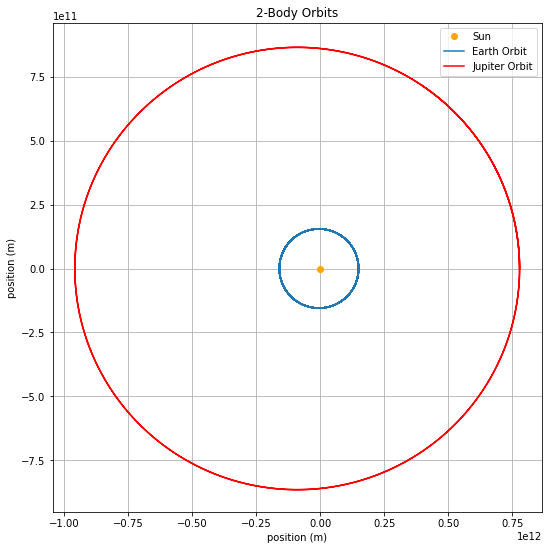

In [8]:
#Mass
sunMass = 1.989*10**30
earthMass = 5.97*10**24
marsMass = 6.39 * 10**23
jupiterMass = 1.898*10**27

#radius
rEarth = 149.6*10**9
rMars = 227.9 *10**9
rJupiter = 778.6*10**9

#Secounds in day: 86400
time, dt = setTime(30*365*86400,86400/4) #Time in secounds

#Get inital velocity
vEarth = getPeriVelocitySI(rEarth,0.0167,earthMass, sunMass)
vJupiter = getPeriVelocitySI(rJupiter,0.0489,1*jupiterMass, sunMass)

#Run Simulation
xE,yE,uE,sE,xJ,yJ,uJ,sJ = RK2ThreeBody(earthMass,rEarth,vEarth,0,1*jupiterMass,rJupiter,vJupiter,0)

#Make plot
plt.figure(figsize=(9,9))
plt.plot(0,0,'o',color = 'orange',label = 'Sun')
plt.plot(xE,yE, label = r'Earth Orbit')
plt.plot(xJ,yJ, label = r'Jupiter Orbit',color = 'red')
plt.axis('square')
plt.grid('on')
plt.title('2-Body Orbits')
plt.xlabel('position (m)')
plt.ylabel('position (m)')
plt.legend(loc = 'upper right')
plt.show()


In [9]:
print('With Jupiter')
radiusSI = getRadius(xE,yE)
radiusAU = toAU(radiusSI)

PrintMinMax(radiusAU)

#Reproduce data from problem 1
print(' ')
print('Without Jupiter')
print('Avg-Radius: 1, Min-Radius: 0.983, Max-Radius: 1.053, Fluctuation: 0.005%')

With Jupiter
Avg-Radius: 1.03574 , Min-Radius: 1.00001, Max-Radius: 1.07036, Fluctuation: 3.44889 %
 
Without Jupiter
Avg-Radius: 1, Min-Radius: 0.983, Max-Radius: 1.053, Fluctuation: 0.005%


## Analysis 1, jupiters effect on earth orbit:
With the adition of jupiter, the perihelion distance will decrease, and the aphelion distance will increase. This then leads to an increase in the total fluctation.

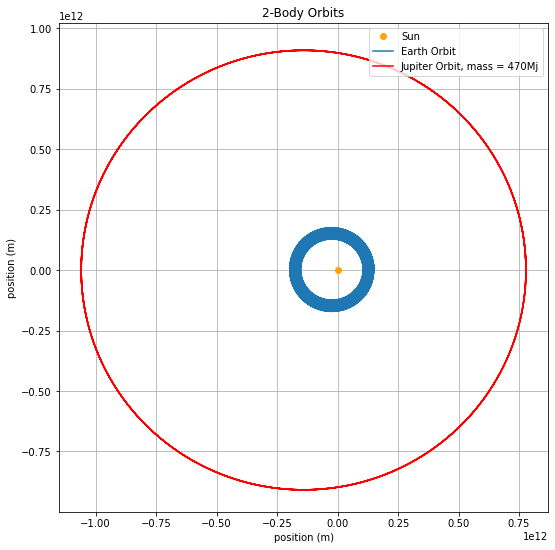

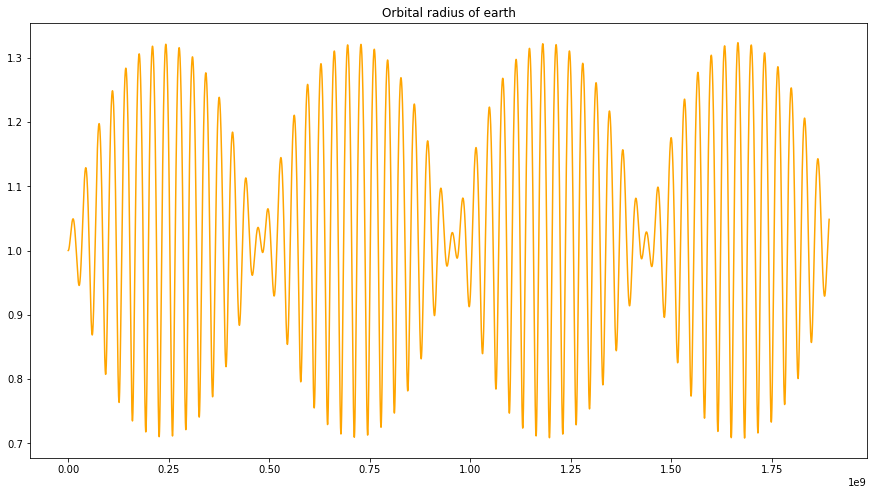

Orbit info
Avg-Radius: 1.04290 , Min-Radius: 0.70826, Max-Radius: 1.32333, Fluctuation: 32.08774 %


In [10]:
#Disrupt earth code
time, dt = setTime(60*365*86400,86400/4) #Time in secounds
vEarth = getPeriVelocitySI(rEarth,0.0167,earthMass, sunMass)
vJupiter = getPeriVelocitySI(rJupiter+300*10**9,0.0489,470*jupiterMass, sunMass)

#Run Simulation
xE,yE,uE,sE,xJ,yJ,uJ,sJ = RK2ThreeBody(earthMass,rEarth,vEarth,0,470*jupiterMass,rJupiter,vJupiter,0)

plt.figure(figsize=(9,9))
plt.plot(0,0,'o',color = 'orange',label = 'Sun')
plt.plot(xE,yE, label = r'Earth Orbit')
plt.plot(xJ,yJ, label = r'Jupiter Orbit, mass = 470Mj',color = 'red')
plt.axis('square')
plt.grid('on')
plt.title('2-Body Orbits')
plt.xlabel('position (m)')
plt.ylabel('position (m)')
plt.legend(loc = 'upper right')
plt.show()


radiusSI = getRadius(xE,yE)
radiusAU = toAU(radiusSI)
plt.figure(figsize=(15,8))
plt.title('Orbital radius of earth')
plt.plot(time,radiusAU,color = 'orange',label = 'Sun')
plt.show()

print('Orbit info')
PrintMinMax(radiusAU)

## Analysis 1b, disrupt earth 
To disrupt the orbit of the Earth the mass of Jupiter needs to be increased till it is 470 time larger than its original mass. At this point earth will have a perihelion of 0.70826 which is then less then Venus. 

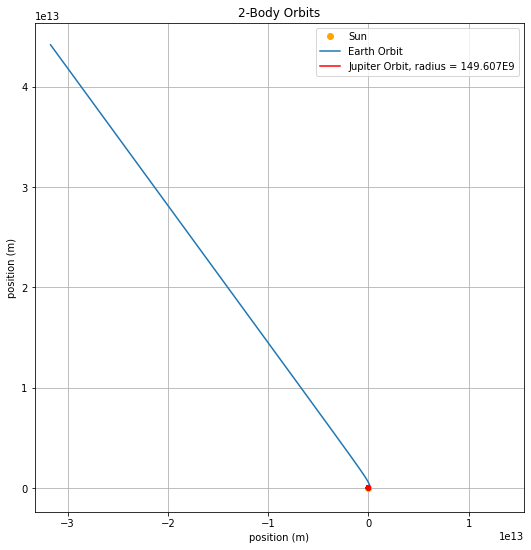

In [11]:
#Gather info to eject earth
rnew = 149.607*10**9
time, dt = setTime(120*365*86400,86400/4) #Time in secounds
vEarth = getPeriVelocitySI(rEarth,0.0167,earthMass, sunMass)
vJupiter = getPeriVelocitySI(rnew,0.0489,1*jupiterMass, sunMass)

#Run Simulation
xE,yE,uE,sE,xJ,yJ,uJ,sJ = RK2ThreeBody(earthMass,rEarth,vEarth,0,1*jupiterMass,rnew,vJupiter,0)

#Make plot
plt.figure(figsize=(9,9))
plt.plot(0,0,'o',color = 'orange',label = 'Sun')
plt.plot(xE,yE, label = r'Earth Orbit')
plt.plot(xJ,yJ, label = r'Jupiter Orbit, radius = 149.607E9', color = 'red')
plt.axis('square')
plt.grid('on')
plt.title('2-Body Orbits')
plt.xlabel('position (m)')
plt.ylabel('position (m)')
plt.legend(loc = 'upper right')
plt.show()





## Analysis 1c. Ejecting earth
By my simulation, Jupiter must be at an orbital radius of 149.607 billion meters to eject the earth from its orbit.

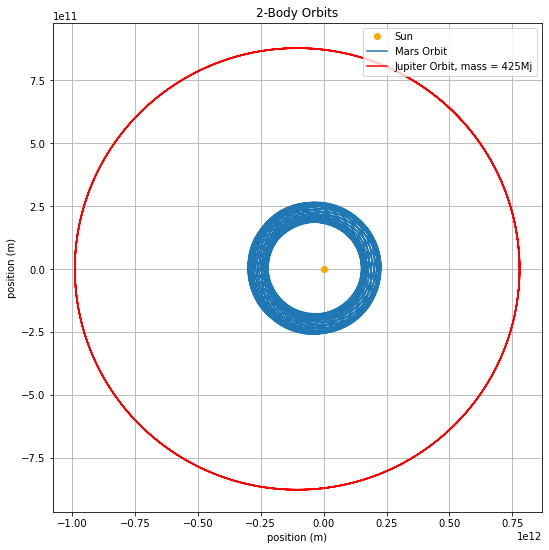

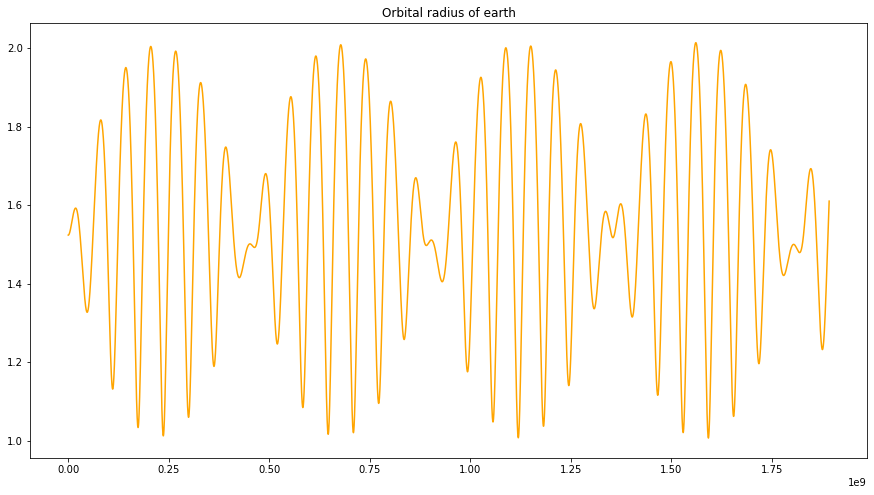

Orbit info
Avg-Radius: 1.55790 , Min-Radius: 1.00668, Max-Radius: 2.01349, Fluctuation: 35.38230 %


In [12]:
#Disrupt mars code
time, dt = setTime(60*365*86400,86400/4) #Time in secounds
vEarth = getPeriVelocitySI(rMars,0.0167,marsMass, sunMass)
vJupiter = getPeriVelocitySI(rJupiter+300*10**9,0.0489,425*jupiterMass, sunMass)

#Run Simulation
xE,yE,uE,sE,xJ,yJ,uJ,sJ = RK2ThreeBody(marsMass,rMars,vEarth,0,425*jupiterMass,rJupiter,vJupiter,0)

plt.figure(figsize=(9,9))
plt.plot(0,0,'o',color = 'orange',label = 'Sun')
plt.plot(xE,yE, label = r'Mars Orbit')
plt.plot(xJ,yJ, label = r'Jupiter Orbit, mass = 425Mj',color = 'red')
plt.axis('square')
plt.grid('on')
plt.title('2-Body Orbits')
plt.xlabel('position (m)')
plt.ylabel('position (m)')
plt.legend(loc = 'upper right')
plt.show()


radiusSI = getRadius(xE,yE)
radiusAU = toAU(radiusSI)
plt.figure(figsize=(15,8))
plt.title('Orbital radius of earth')
plt.plot(time,radiusAU,color = 'orange',label = 'Sun')
plt.show()

print('Orbit info')
PrintMinMax(radiusAU)

## Analysis 2b, disrupt mars
To disrupt the orbit of Mars the mass of Jupiter needs to be increased till it is 425 time larger than its original mass. At this point Mars will have a perihelion of 1.00668 which is equal to the value of the earths orbit at some times. 

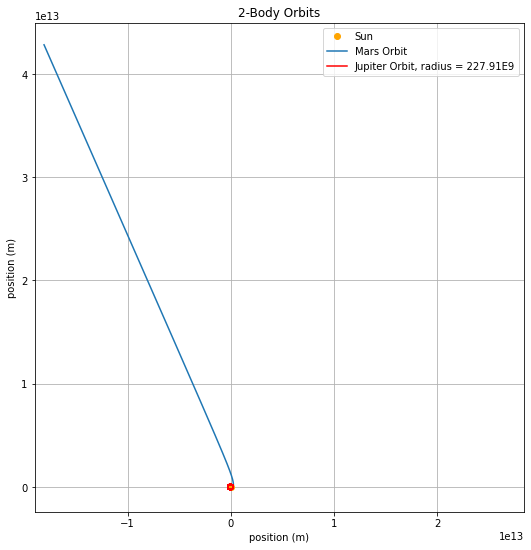

In [13]:
#Gather info to eject MArs
rnew = 227.91 *10**9 # rMars = 227.9 *10**9

time, dt = setTime(120*365*86400,86400/4) #Time in secounds
vEarth = getPeriVelocitySI(rMars,0.0167,marsMass, sunMass)
vJupiter = getPeriVelocitySI(rnew,0.0489,1*jupiterMass, sunMass)

#Run Simulation
xE,yE,uE,sE,xJ,yJ,uJ,sJ = RK2ThreeBody(marsMass,rMars,vEarth,0,1*jupiterMass,rnew,vJupiter,0)

#Make plot
plt.figure(figsize=(9,9))
plt.plot(0,0,'o',color = 'orange',label = 'Sun')
plt.plot(xE,yE, label = r'Mars Orbit')
plt.plot(xJ,yJ, label = r'Jupiter Orbit, radius = 227.91E9', color = 'red')
plt.axis('square')
plt.grid('on')
plt.title('2-Body Orbits')
plt.xlabel('position (m)')
plt.ylabel('position (m)')
plt.legend(loc = 'upper right')
plt.show()

## Analysis 1c. Ejecting mars
By my simulation, Jupiter must be at an orbital radius of 227.91 billion meters to eject Mars from its orbit. This is much further from mars orbit then was needed to eject the earth. The reason for this is that the earth has more mass and is closer to the sun. 